<a href="https://colab.research.google.com/github/alex-d-gard/EEC206_Deraining/blob/main/Deraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Useful resources:
# https://paperswithcode.com/task/single-image-deraining

In [ ]:
# Step one was to download the train, test, and test_noGT zip files from the challenges page
# I saved them into a folder following this guide: https://support.google.com/files/answer/9048509?hl=en
# It is for android phones but it worked the same. Right click zipped folder > open with > zip extractor
# Do this for all three zipped folders.
# I renamed the folders as I saw fit to simplify things
# Connect to google drive to allow access to the images and folders
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Force it to go to home directory then access the proper directory each time
# to avoid path issues
# Display the names of all the folders we will work with
%cd /home/../content
%ls -a
%cd gdrive/My Drive/
%pwd
%cd Colab Notebooks/GitProject
%ls
%pwd

/content
./  ../  .config/  gdrive/  sample_data/
/content/gdrive/My Drive
/content/gdrive/My Drive/Colab Notebooks/GitProject
Deraining.ipynb  EEC206FinalProject/  git.ipynb  test_GT/  test_noGT/  train/


'/content/gdrive/My Drive/Colab Notebooks/GitProject'

# First task is to create the training, testing w/ ground truth, and testing w/out ground truth sets.

In [ ]:
import os
from torchvision.io import read_image
from PIL import Image
from __future__ import print_function, division
import torch
import torch.nn as nn
import torchvision.datasets as Dataset
import torchvision.models as models
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import urllib.request

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [ ]:
test_gt_path = "/content/gdrive/My Drive/Colab Notebooks/GitProject/test_GT/test_b/test_b/data"
test_gt_clean_path = "/content/gdrive/My Drive/Colab Notebooks/GitProject/test_GT/test_b/test_b/gt"
test_nogt_path = "/content/gdrive/My Drive/Colab Notebooks/GitProject/test_noGT/test_a/test_a/data"
train_path = "/content/gdrive/My Drive/Colab Notebooks/GitProject/train/"
train_clean_path = "/content/gdrive/My Drive/Colab Notebooks/GitProject/train/"

In [ ]:
os.chdir(test_gt_path)
os.getcwd()
train_set = os.listdir()
print(train_set)

['16_rain.jpg', '17_rain.jpg', '84_rain.jpg', '85_rain.jpg', '225_rain.jpg', '224_rain.jpg', '102_rain.jpg', '103_rain.jpg', '190_rain.jpg', '191_rain.jpg', '28_rain.jpg', '175_rain.jpg', '29_rain.jpg', '174_rain.jpg', '61_rain.jpg', '60_rain.jpg', '4_rain.jpg', '5_rain.jpg', '55_rain.jpg', '108_rain.jpg', '54_rain.jpg', '109_rain.jpg', '141_rain.jpg', '140_rain.jpg', '136_rain.jpg', '137_rain.jpg', '211_rain.jpg', '210_rain.jpg', '22_rain.jpg', '23_rain.jpg', '187_rain.jpg', '186_rain.jpg', '48_rain.jpg', '115_rain.jpg', '114_rain.jpg', '49_rain.jpg', '93_rain.jpg', '92_rain.jpg', '232_rain.jpg', '233_rain.jpg', '245_rain.jpg', '244_rain.jpg', '76_rain.jpg', '77_rain.jpg', '162_rain.jpg', '163_rain.jpg', '156_rain.jpg', '157_rain.jpg', '238_rain.jpg', '239_rain.jpg', '99_rain.jpg', '98_rain.jpg', '42_rain.jpg', '43_rain.jpg', '168_rain.jpg', '35_rain.jpg', '169_rain.jpg', '34_rain.jpg', '206_rain.jpg', '207_rain.jpg', '121_rain.jpg', '120_rain.jpg', '112_rain.jpg', '113_rain.jpg', '18

In [ ]:
def pil_loader(path):
    # open path as file to avoid ResourceWarning (https://github.com/python-pillow/Pillow/issues/835)
    with open(path, 'rb') as f:
        img = Image.open(f)
        return img.convert('RGB')
class RainDataSet(Dataset):
    
    def __init__(self, img_dir, transform=None, target_transform=None):
        self.img_names = os.listdir(img_dir)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        
        
    def __len__(self):
        return len(self.img_names)
        
    def __getitem__(self, index):
        if torch.is_tensor(index):
            index = index.tolist()
        img_path = os.path.join(self.img_dir, self.img_names[index])
        image = pil_loader(img_path)
        #label = self.img_labels.iloc[index, 5]-1
        #name = self.img_labels.iloc[index, 0]
        if self.transform:
            image = self.transform(image)
        #if self.target_transform:
        #    label = self.target_transform(label)
        return image#, label

249
<PIL.Image.Image image mode=RGB size=720x480 at 0x7F073B66F9D0>


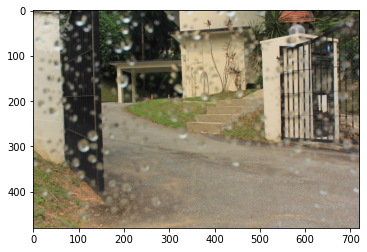

In [ ]:
rain_dataset = RainDataSet(img_dir= test_gt_path)
print(rain_dataset.__len__())
fig = plt.figure()
print(rain_dataset.__getitem__(5))
rainy_image = rain_dataset.__getitem__(5)
rainy_image= plt.imshow(rainy_image)
plt.show()